In [1]:
import pandas as pd
df = pd.read_csv('/Users/krishnasoni/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df.shape


(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt

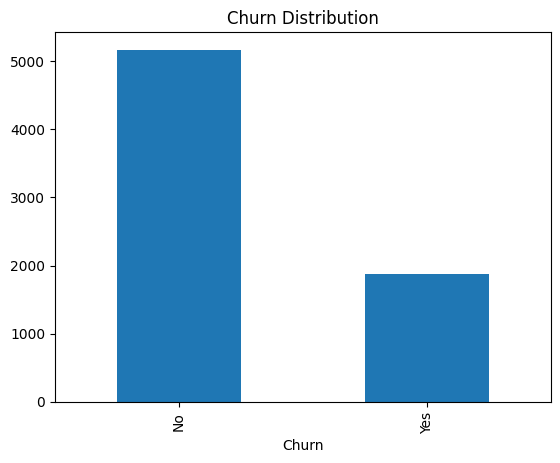

In [12]:
df["Churn"].value_counts().plot(kind="bar", title="Churn Distribution")
plt.show()


In [13]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[num_cols].describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


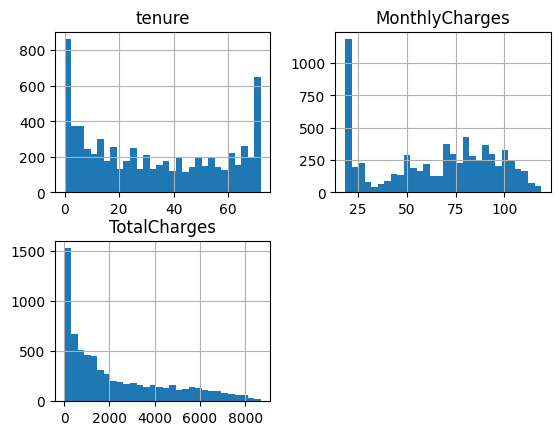

In [14]:
df[num_cols].hist(bins=30)
plt.show()


In [15]:
import seaborn as sns

sns.set()

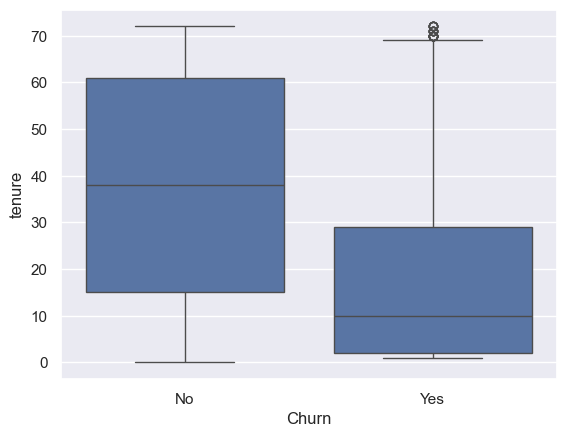

In [16]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.show()


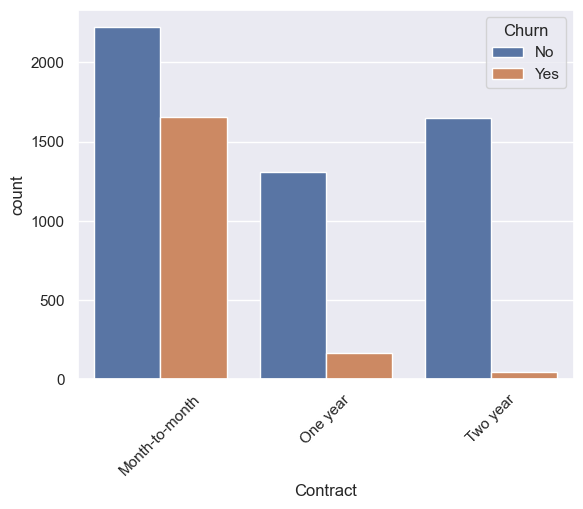

In [17]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.show()


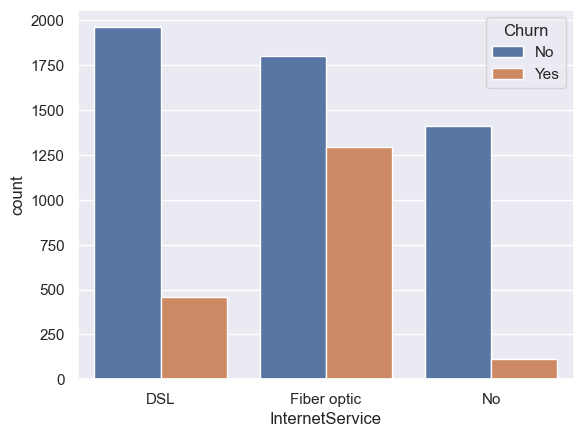

In [18]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.show()


In [21]:
df_numeric = d.select_dtypes(include=["int64", "float64"])

sns.heatmap(df_numeric.corr(), an_not=True)
plt.show()


NameError: name 'd' is not defined

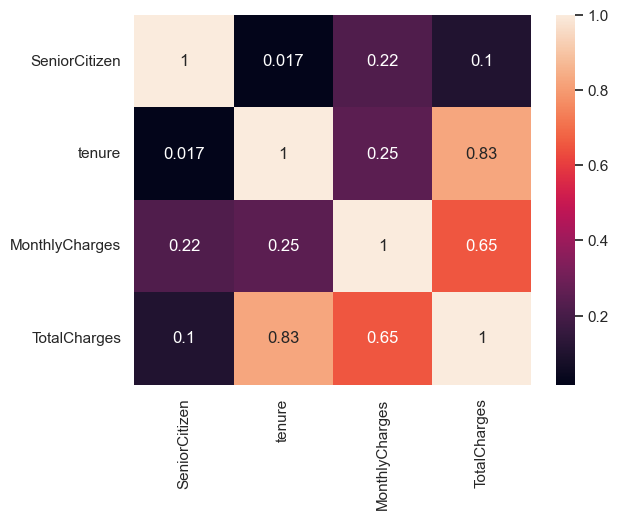

In [22]:
df_numeric = df.select_dtypes(include=["int64", "float64"])

sns.heatmap(df_numeric.corr(), annot=True)
plt.show()


In [23]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)


Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64